In [ ]:
import torch
import torchvision
from torchvision import datasets
import torch.nn as nn
import torchvision.transforms as transforms
import pandas as pd
import numpy as np
import torch.nn.functional as F
from torch.utils.data import DataLoader, random_split
import torch.optim as optim

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)

# Load and split data

In [7]:
DATA_PATH = "../train/train"
dataset = datasets.ImageFolder(root=DATA_PATH, transform=transform)
idx_to_class = tuple([k for k, _ in dataset.class_to_idx.items()])

torch.manual_seed(42)
train_dataset, val_dataset = random_split(dataset,[0.8, 0.2])
torch.manual_seed(torch.initial_seed()) # reset seed

In [8]:
batch_size = 32

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=6)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True, num_workers=6)

# Peek data

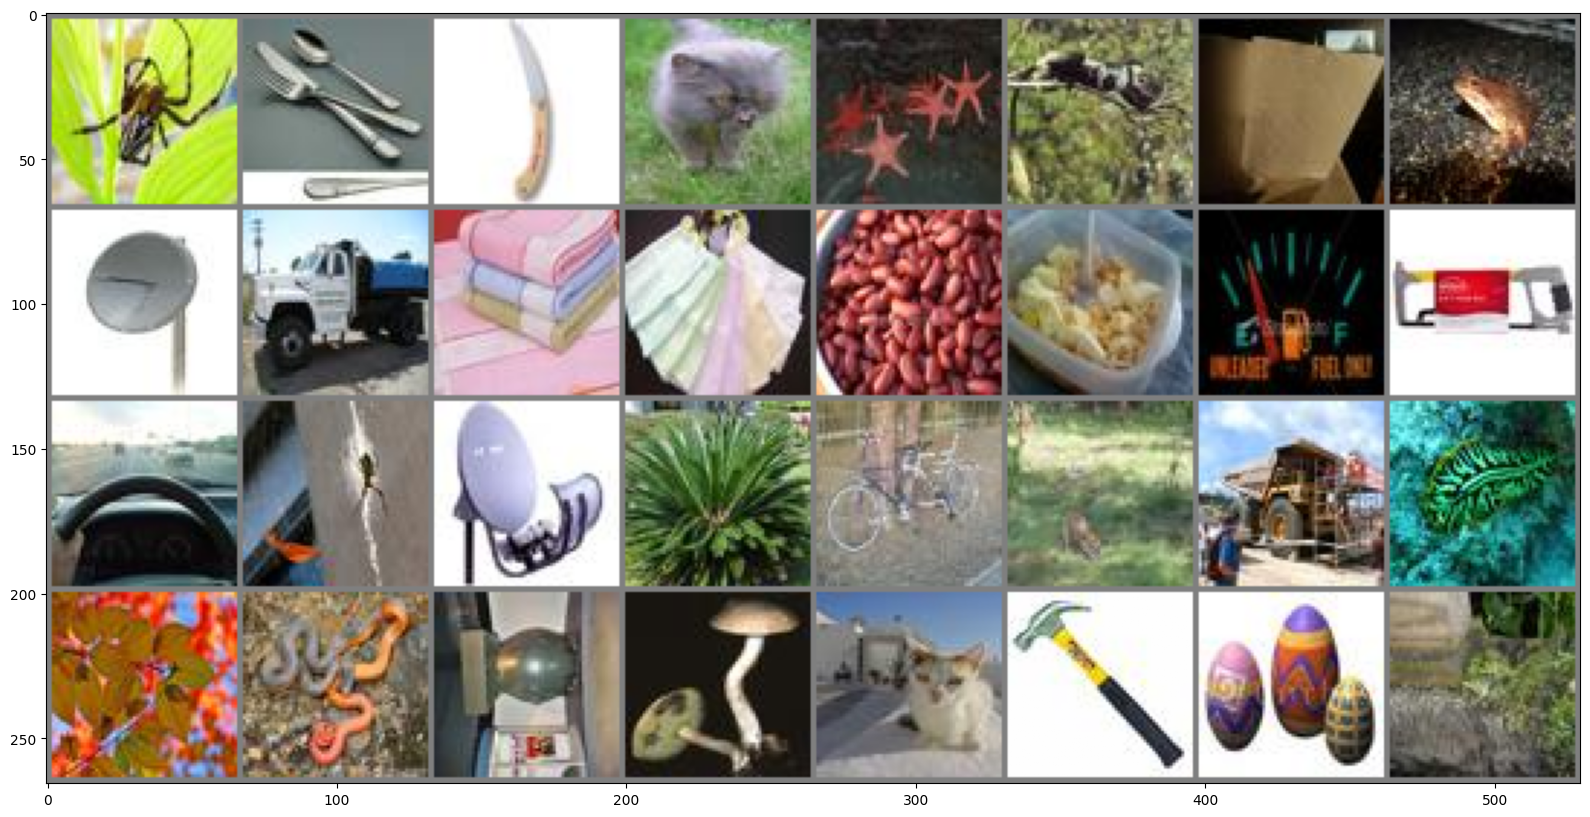

spider spoon saw cat echinoderm monkey towel frog antenna truck towel towel bean egg gauge saw gauge spider antenna palm bicycle kangaroo truck worm birch snake bomb fungus cat hammer egg frog


In [34]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20, 10))

# get some random training images
images, labels = next(iter(train_loader))


def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
images, labels = next(iter(train_loader))

# show images
imshow(torchvision.utils.make_grid(images))

print(" ".join(f"{idx_to_class[labels[j]]}" for j in range(batch_size)))

In [ ]:
class CNN(nn.Module):
    def __init__(self, output_size):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3,64, kernel_size = 11,  stride = 4, padding = 2)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool1 = nn.MaxPool2d(kernel_size =3, stride = 2)
        self.conv2 = nn.Conv2d(64, 192, kernel_size = 5, padding = 2)
        self.maxpool2 = nn.MaxPool2d(kernel_size = 3, stride = 2)
        self.conv3 = nn.Conv2d(192, 384, kernel_size = 3, padding = 1)
        self.conv3  = nn.Conv2d(384, 256, kernel_size = 3, padding = 1)
        self.maxpool3 = nn.MaxPool2d(kernel_size = 3, stride = 2)
        self.avgpool = nn.AdaptiveAvgPool2d((6,6))
        self.dropout = nn.Dropout(0.1)
        self.fc1 = nn.Linear(256*6*6, 4096)
        self.fc2 = nn.Linear(4096, 4096)
        self.fc3 = nn.Linear(4096, output_size)
    
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.conv1(x)
        x = self.relu(x)
        x = self.maxpool1(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.maxpool2(x)
        x = self.conv3(x)
        x = self.relu(x)
        x = self.conv4(x)
        x = self.relu(x)
        x = self.conv5(x)
        x = self.relu(x)
        x = self.maxpool3(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc3(x)
        return x
    
        
        
        
        
        

In [ ]:
model = CNN(len(dataset.classes))

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer   = optim.Adam(model.parameters(), lr = 0.0001)